In [64]:
import numpy as np
from matplotlib import rcParamsDefault
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [65]:
plt.rcParams["figure.dpi"]=150
plt.rcParams["figure.facecolor"]="white"
plt.rcParams["figure.figsize"]=(8, 6)

In [66]:
bands_f = np.loadtxt('../DM_high_P/gap_DM_a_3.0_test.band.gnu')
k = np.unique(bands_f[:, 0])
bands = np.reshape(bands_f[:, 1], (-1, len(k)))

(0.0, 7.1263)

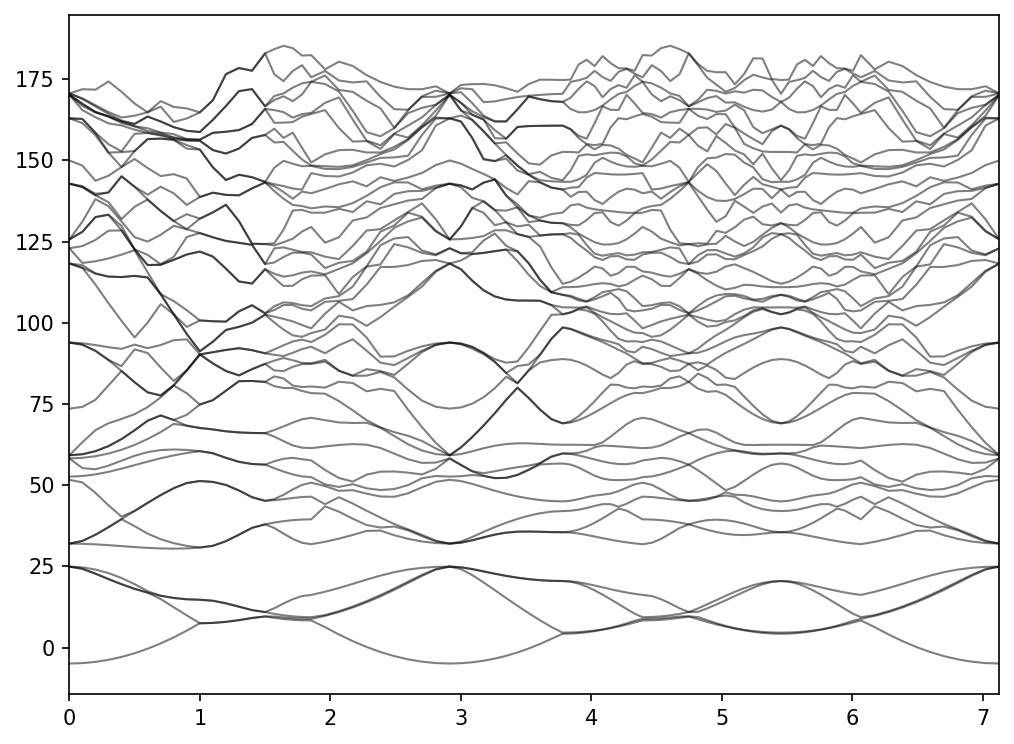

In [67]:
for band in range(len(bands)):
    plt.plot(k, bands[band, :], linewidth=1, alpha=0.5, color='k')
plt.xlim(min(k), max(k))

In [68]:
dos_f = pd.read_table("../DM_high_P/gap_DM_a_3.0_test.dos", delimiter=" ", header=None) #E_fermi from dos file
E_fermi = float(dos_f[17][0])
print('E_fermi: ', E_fermi, 'eV')

E_fermi:  27.569 eV


VBM: -2.6184999999999974
CBM: 2.8956000000000017
k_VBM: 0.0
k_CBM: 0.8
Bandgap indirect-bandgap 5.51 (eV)


Text(0.4, -2.6184999999999974, 'indirect-bandgap 5.51 (eV)')

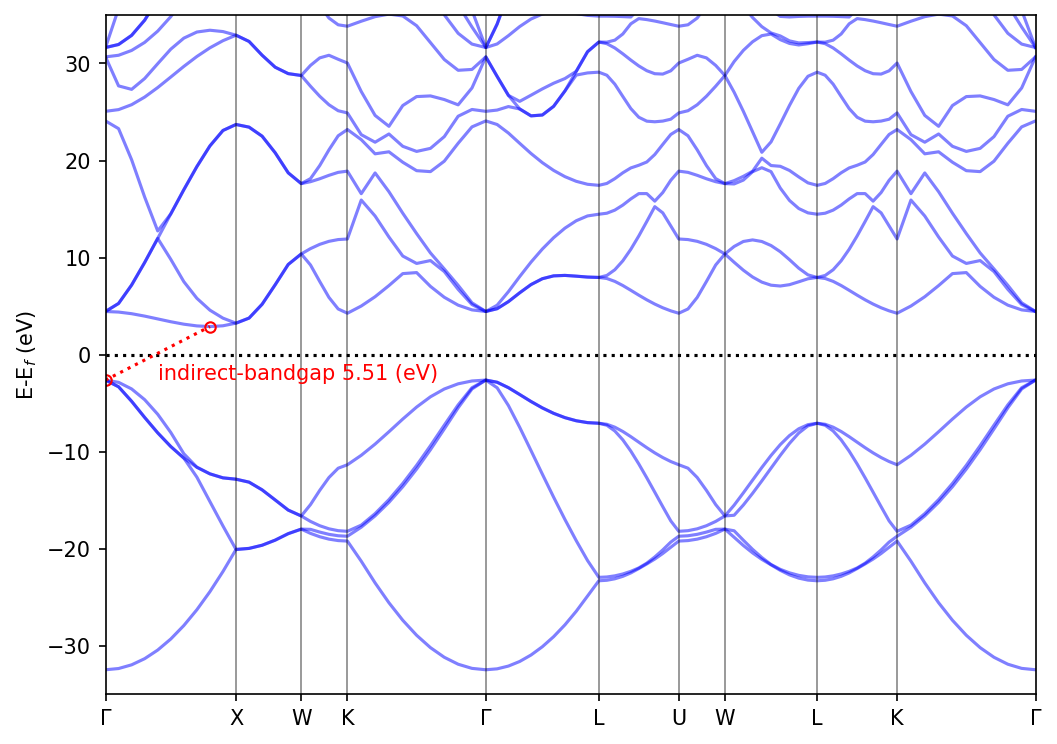

In [91]:
VBM = -20
CBM = 20
for band in range(len(bands)):
    plt.plot(k, bands[band, :]-E_fermi, linewidth=1.5, alpha=0.5, color='b') 
    if max(bands[band, :]-E_fermi) < 0 and max(bands[band, :]-E_fermi) > VBM : 
        VBM = max(bands[band, :]-E_fermi)  
        k_VBM = k[list(bands[band, :]-E_fermi).index(VBM)]
    elif min(bands[band, :]-E_fermi) > 0 and min(bands[band, :]-E_fermi) < CBM:
        CBM = min(bands[band, :]-E_fermi)
        k_CBM = k[list(bands[band, :]-E_fermi).index(CBM)]
plt.xlim(min(k), max(k))
plt.ylim(-35, 35)
plt.hlines(0, min(k), max(k), color='k', linestyle=':')

# High symmetry k-points (check bands_###.out)
plt.axvline(1, linewidth=0.75, color='k', alpha=0.5)
plt.axvline(1.5, linewidth=0.75, color='k', alpha=0.5)
plt.axvline(1.8536, linewidth=0.75, color='k', alpha=0.5)
plt.axvline(2.9142, linewidth=0.75, color='k', alpha=0.5)
plt.axvline(3.7802, linewidth=0.75, color='k', alpha=0.5)
plt.axvline(4.3926, linewidth=0.75, color='k', alpha=0.5)
plt.axvline(4.7462, linewidth=0.75, color='k', alpha=0.5)
plt.axvline(5.4533, linewidth=0.75, color='k', alpha=0.5)
plt.axvline(6.0656, linewidth=0.75, color='k', alpha=0.5)

plt.xticks(ticks= [0, 1, 1.5, 1.8536, 2.9142, 3.7802, 4.3926, 4.7462, 5.4533, 6.0656, 7.1263], labels=['$\Gamma$', 'X', 'W', 'K', '$\Gamma$', 'L', 'U', 'W', 'L', 'K', '$\Gamma$'])
plt.ylabel("E-E$_f$ (eV)")

print('VBM:', VBM)
print('CBM:', CBM)
print('k_VBM:', k_VBM)
print('k_CBM:', k_CBM)

# Valence band maximum (VBM)
plt.plot(k_VBM, VBM, marker="o", markersize=5, markeredgecolor="red", markerfacecolor='none')

# Conduction band minimum (CBM)
plt.plot(k_CBM, CBM, marker="o", markersize=5, markeredgecolor="red", markerfacecolor='none')

# Energy bandgap
plt.plot([k_VBM, k_CBM], [VBM, CBM], 'r:')
if k_VBM == k_CBM:
    gap_type = 'direct'
else:
    gap_type = 'indirect'
Eg = CBM-VBM
bandgap = '%s-bandgap %.2f (eV)' % (gap_type, Eg)
print('Bandgap', bandgap)
plt.text(k_CBM-0.4, VBM, bandgap, color='r')